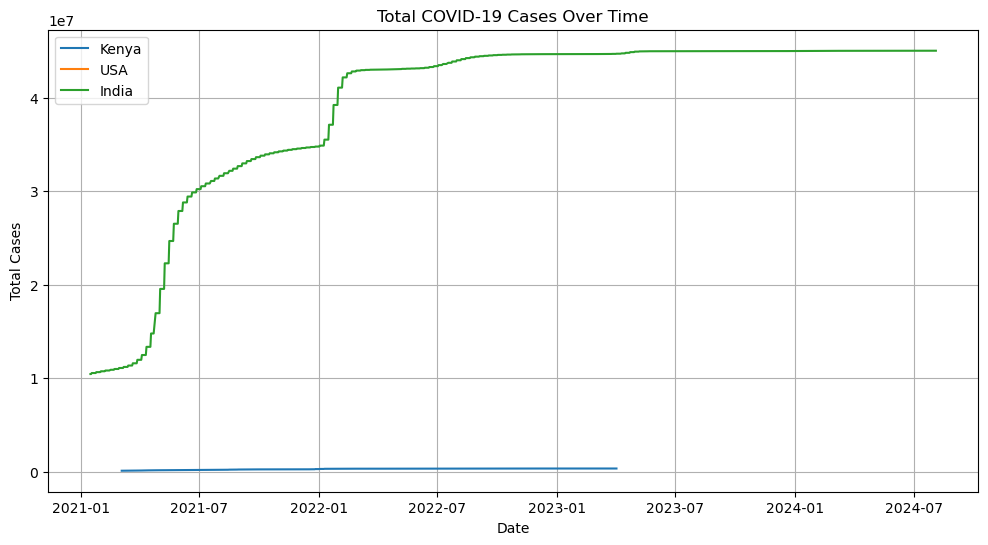

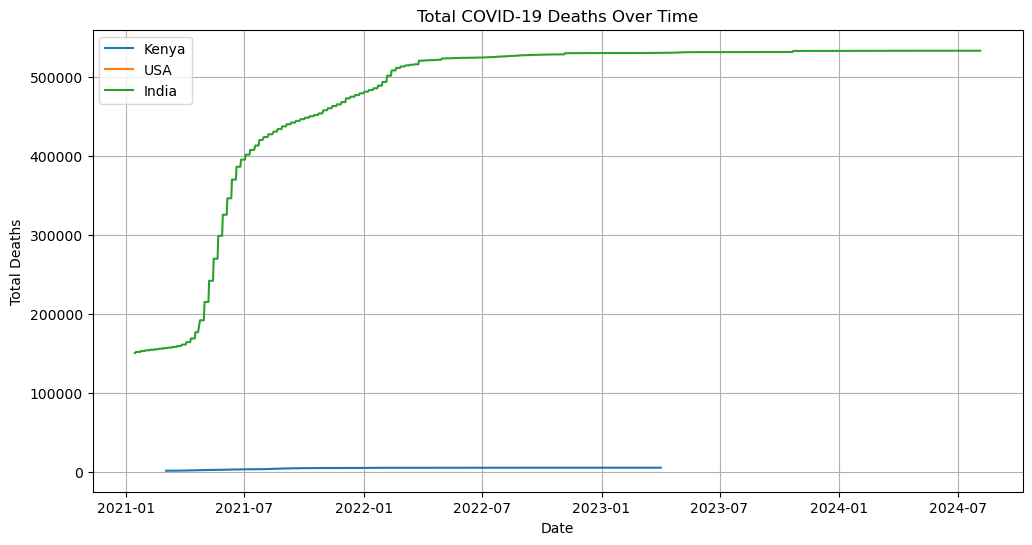

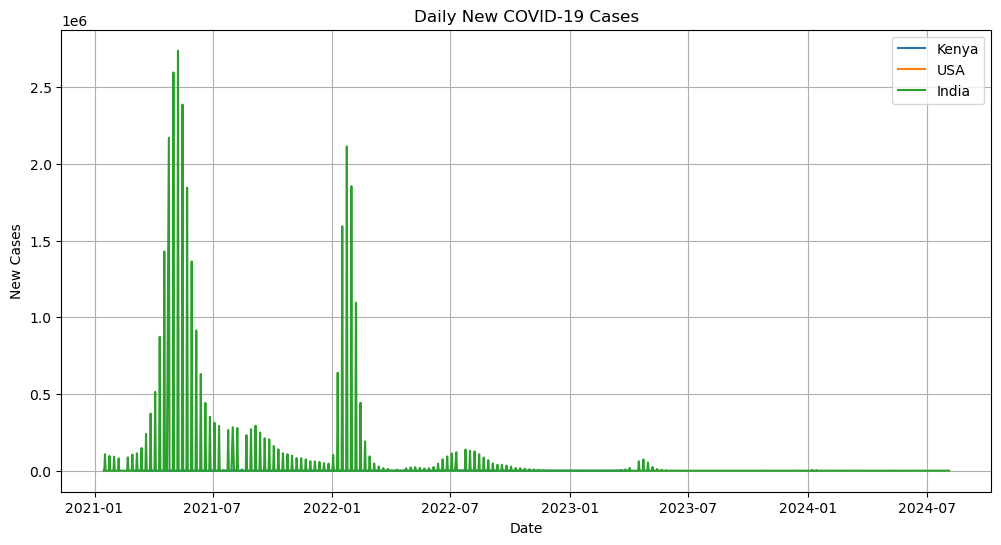

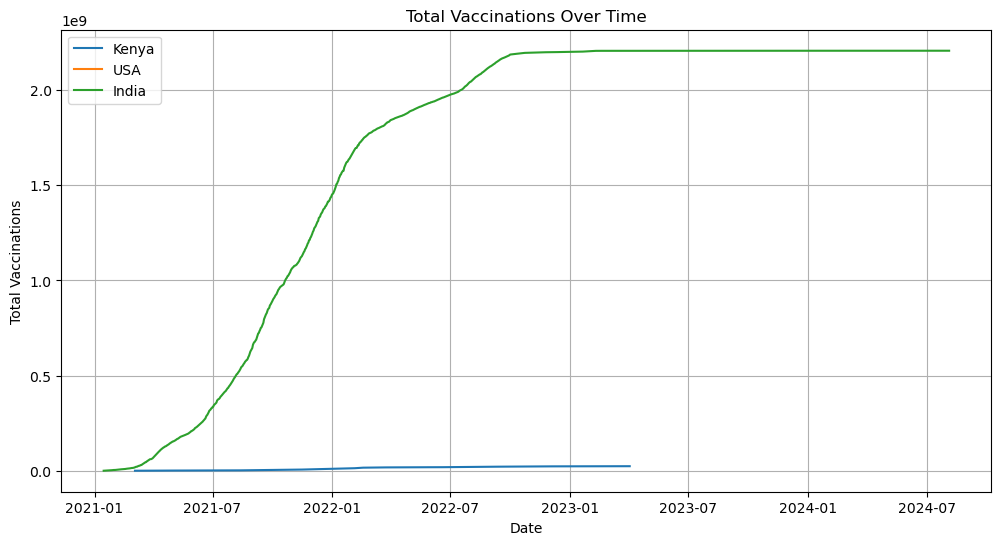

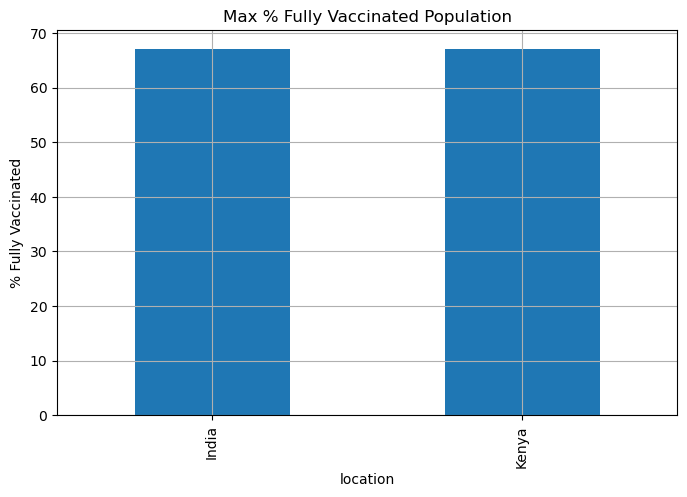

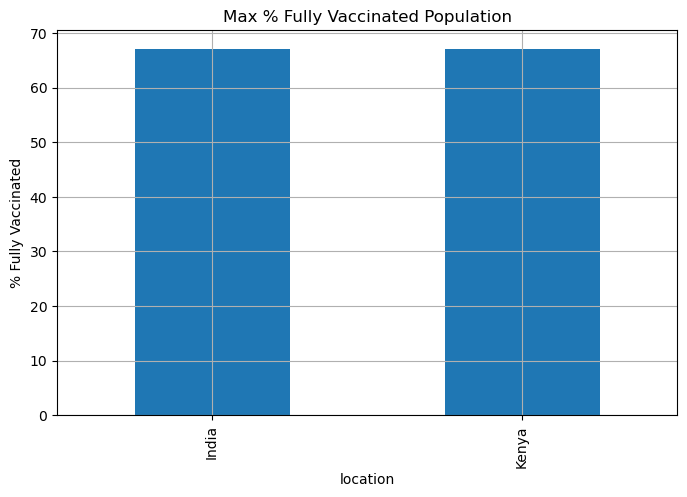

          total_cases  total_deaths  total_vaccinations  death_rate
location                                                           
India      45041748.0      533623.0        2.206868e+09    0.014449
Kenya        342983.0        5688.0        2.375043e+07    0.020919


In [3]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional
# import plotly.express as px

# 📁 Load Data
df = pd.read_csv('owid-covid-data.csv')

# 🧼 Data Cleaning
# Focus on selected countries
countries = ['Kenya', 'USA', 'India']
df = df[df['location'].isin(countries)]

# Convert date column
df['date'] = pd.to_datetime(df['date'])

# Drop rows with missing key values
df = df.dropna(subset=['total_cases', 'total_deaths', 'total_vaccinations'])

# Fill other missing values
df = df.fillna(method='ffill')

# 📊 Exploratory Data Analysis (EDA)

## Total Cases Over Time
plt.figure(figsize=(12, 6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.show()

## Total Deaths Over Time
plt.figure(figsize=(12, 6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_deaths'], label=country)
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)
plt.show()

## New Cases Comparison
plt.figure(figsize=(12, 6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['new_cases'], label=country)
plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.show()

## Death Rate Calculation
df['death_rate'] = df['total_deaths'] / df['total_cases']

# 🧪 Vaccination Progress

## Cumulative Vaccinations
plt.figure(figsize=(12, 6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_vaccinations'], label=country)
plt.title('Total Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.show()

if 'people_fully_vaccinated_per_hundred' in df.columns:
    final_vax = (
        df[['location', 'people_fully_vaccinated_per_hundred']]
        .dropna()
        .groupby('location')['people_fully_vaccinated_per_hundred']
        .max()
    )

    if not final_vax.empty:
        final_vax.plot(kind='bar', figsize=(8, 5), title='Max % Fully Vaccinated Population')
        plt.ylabel('% Fully Vaccinated')
        plt.grid(True)
        plt.show()
    else:
        print("No valid vaccination data available to plot.")

## % Vaccinated Population (if column exists)
if 'people_fully_vaccinated_per_hundred' in df.columns:
    final_vax = df.groupby('location')['people_fully_vaccinated_per_hundred'].max()
    final_vax.plot(kind='bar', figsize=(8, 5), title='Max % Fully Vaccinated Population')
    plt.ylabel('% Fully Vaccinated')
    plt.grid(True)
    plt.show()

# 📌 Descriptive Statistics
print(df.groupby('location')[['total_cases', 'total_deaths', 'total_vaccinations', 'death_rate']].max())


In [4]:
# COVID-19 Global Trends Analysis

## Introduction
This project analyzes global COVID-19 data, focusing on Kenya, the USA, and India. It explores trends in cases, deaths, and vaccinations over time.

## Data Source
Data is from [Our World in Data](https://ourworldindata.org/coronavirus-source-data), downloaded as `owid-covid-data.csv`.

## Data Cleaning
- Filtered to selected countries.
- Converted date column.
- Forward-filled missing numeric data.

## Exploratory Data Analysis
Visualizations include:
- Total cases and deaths over time
- Daily new case trends
- Vaccination progress

## Key Insights
1. USA had the highest case counts but also the fastest vaccination rollout.
2. India saw sharp peaks in new cases mid-2021, followed by a decline.
3. Kenya’s death rate remained stable with lower absolute numbers.
4. Vaccination rates plateaued in some countries post-2022.

## Conclusion
This analysis helps understand how different countries responded to the pandemic and their outcomes over time.


SyntaxError: invalid character '’' (U+2019) (1859003334.py, line 23)